In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
dados = pd.read_csv('StudentsPerformance.csv')
dados

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [5]:
dados.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

**Distribuição das Notas**

In [30]:
notas = dados[['math score','reading score','writing score']]
notas.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


* Matemática

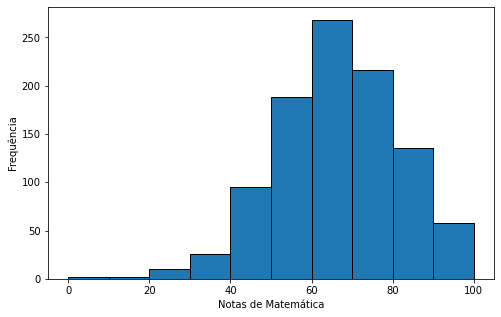

In [54]:
plt.figure(figsize=(8,5))
plt.hist(notas['math score'], edgecolor='k')
plt.xlabel('Notas de Matemática')
plt.ylabel('Frequência')
plt.show()

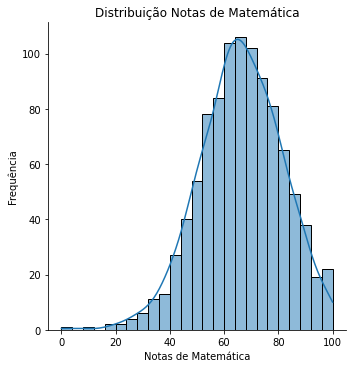

In [56]:
sns.displot(notas['math score'], kde=True)
plt.title('Distribuição Notas de Matemática')
plt.xlabel('Notas de Matemática')
plt.ylabel('Frequência')
plt.show()

* Leitura

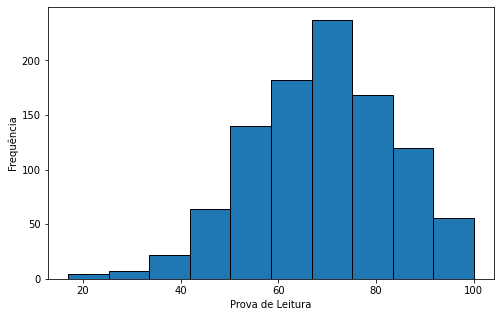

In [59]:
plt.figure(figsize=(8,5))
plt.hist(notas['reading score'], edgecolor='k')
plt.xlabel('Prova de Leitura')
plt.ylabel('Frequência')
plt.show()

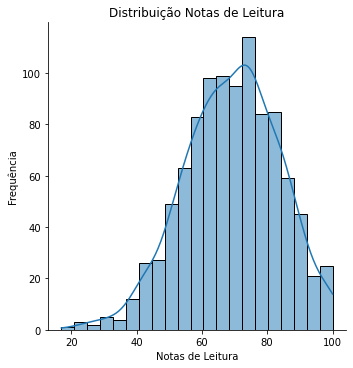

In [62]:
sns.displot(notas['reading score'], kde=True)
plt.title('Distribuição Notas de Leitura')
plt.xlabel('Notas de Leitura')
plt.ylabel('Frequência');

* Escrita

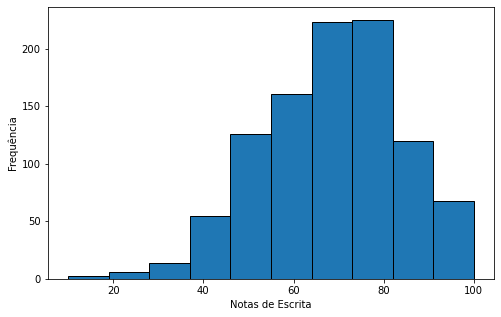

In [66]:
plt.figure(figsize=(8,5))
plt.hist(notas['writing score'], edgecolor='k')
plt.xlabel('Notas de Escrita')
plt.ylabel('Frequência')

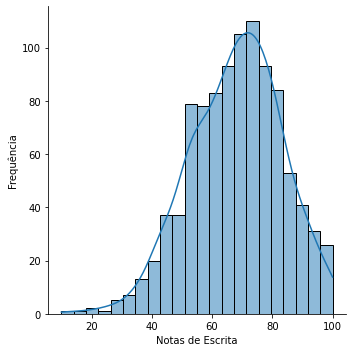

In [72]:
sns.displot(notas['writing score'], kde=True)
plt.xlabel('Notas de Escrita')
plt.ylabel('Frequência');

**Distribuição das 3 notas**

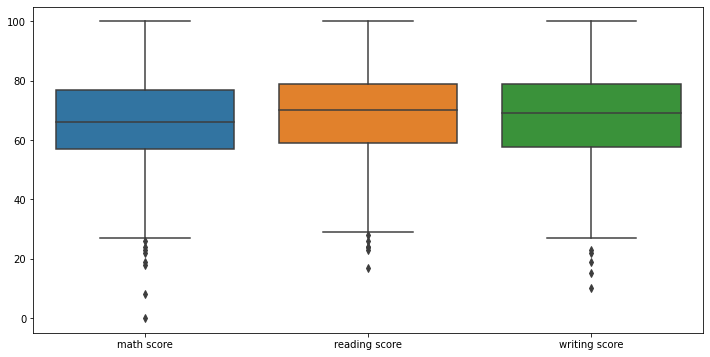

In [43]:
plt.figure(figsize=(12,6))
sns.boxplot(data=notas)
plt.show()

**Médias das 3 notas**

In [84]:
medias = list(notas.mean().values)
materias = list(notas.mean().index)

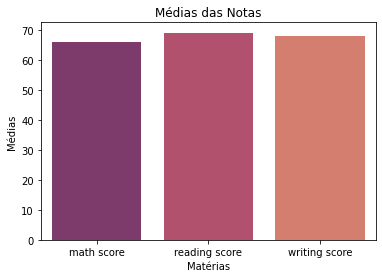

In [142]:
sns.barplot(x=materias, y=medias, palette='flare_r')
plt.xlabel('Matérias')
plt.ylabel('Médias')
plt.title('Médias das Notas')
plt.show()

**Criando coluna "aprovados"**

* Separando as notas por matéria

In [148]:
math = list(notas['math score'].values)
reading = list(notas['reading score'].values)
writing = list(notas['writing score'].values)

* Criando uma lista com os valores das 3 notas por aluno

In [176]:
lista = [(math[i], reading[i], writing[i]) for i in range(len(math))]

* Criando uma lista com os valores das médias totais de cada aluno

In [167]:
lista2 = []
for i in lista:
    a = round(sum(i)/3, 2)
    lista2.append(a)

* Atribuindo as médias à um DataFrame

In [186]:
df = pd.DataFrame(lista2)
df.rename(columns={0:'Nota Final'}, inplace=True)
df

,Nota Final
0,72.67
1,82.33
2,92.67
3,49.33
4,76.33
...,...
995,94.00
996,57.33
997,65.00
998,74.33


* Criando coluna

In [207]:
dados['aprovados'] = np.nan

* Selecionando índices dos aprovados

In [218]:
aprovados = list(df.sort_values(by='Nota Final', ascending=False).head(50).index)

* Atribuindo o valor 'aprovado' para os 50 primeiros

In [223]:
dados.loc[aprovados] = dados.loc[aprovados].fillna('aprovado')

* Atribuindo o valor 'não aprovado' para os demais

In [228]:
dados['aprovados'] = dados['aprovados'].fillna('nao aprovado')

**Selecionando os Aprovados**

In [239]:
top50 = dados.loc[dados['aprovados'] == 'aprovado']

* Quantidade de homens e mulheres que fizeram os testes

In [240]:
dados['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

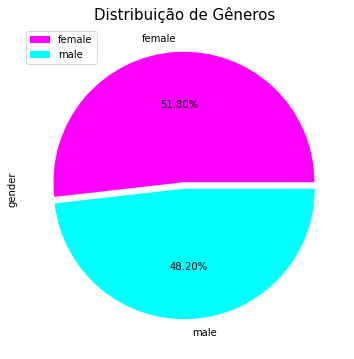

In [288]:
dados['gender'].value_counts().plot(kind='pie', figsize=(8,6), autopct='%1.2f%%', colormap='cool_r', explode=[0.05,0])
plt.title('Distribuição de Gêneros', size=15)
plt.legend(loc='upper left')
plt.show()

* Quantidade de homens e mulheres aprovados

In [233]:
top50['gender'].value_counts()

female    36
male      14
Name: gender, dtype: int64

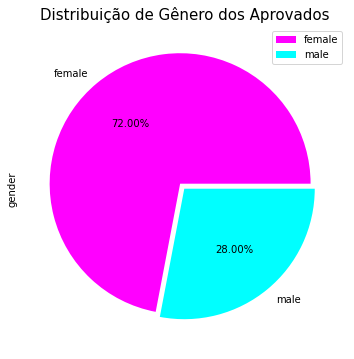

In [294]:
top50['gender'].value_counts().plot(kind='pie', autopct='%1.2f%%', colormap='cool_r', explode=[0.05,0], figsize=(8,6))
plt.title('Distribuição de Gênero dos Aprovados', size=15)
plt.legend(loc='upper right')
plt.show()

**Média das Notas por Sexo**

* Matemática

In [412]:
media_math = dados[['gender','math score']].groupby('gender').mean()
media_math

,math score
gender,
female,63.633205
male,68.728216


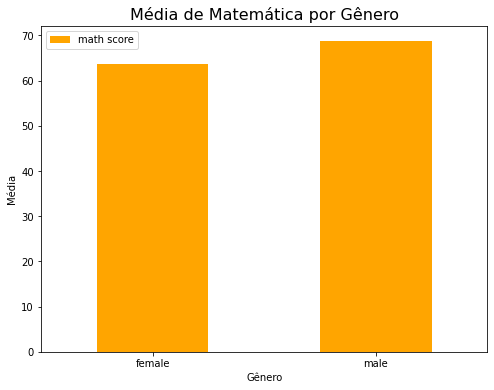

In [408]:
media_math.plot(kind='bar', figsize=(8,6), color='orange')
plt.title('Média de Matemática por Gênero', size=16)
plt.xticks(rotation=0)
plt.xlabel('Gênero')
plt.ylabel('Média')
plt.show()

* Leitura

In [413]:
media_read = dados[['gender','reading score']].groupby('gender').mean()
media_read

,reading score
gender,
female,72.608108
male,65.473029


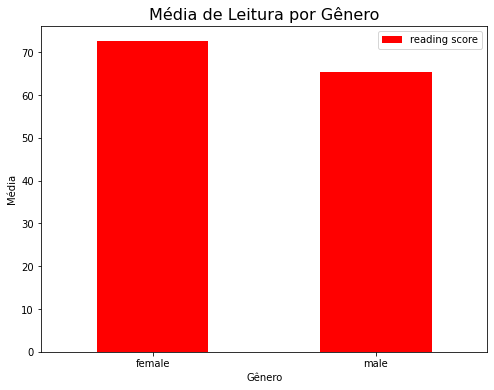

In [409]:
media_read.plot(kind='bar', figsize=(8,6), color='red')
plt.title('Média de Leitura por Gênero', size=16)
plt.xticks(rotation=0)
plt.xlabel('Gênero')
plt.ylabel('Média')
plt.show()

In [411]:
media_wri = dados[['gender','writing score']].groupby('gender').mean()
media_wri

,writing score
gender,
female,72.467181
male,63.311203


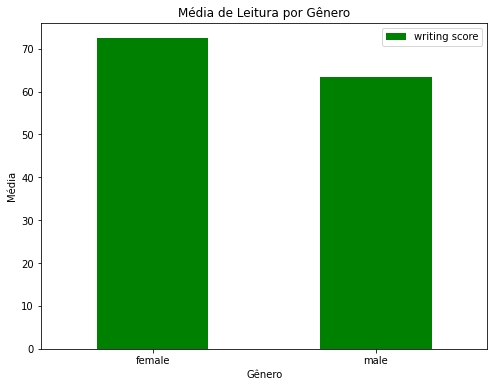

In [415]:
media_wri.plot(kind='bar', figsize=(8,6), color='green')
plt.title('Média de Leitura por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Média')
plt.xticks(rotation=0)
plt.show()

**Quantidade de candidatos que fizeram curso preparatório**

In [328]:
dados['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

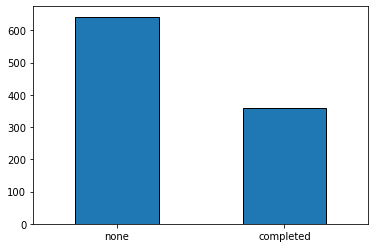

In [416]:
dados['test preparation course'].value_counts().plot(kind='bar', edgecolor='k')
plt.xticks(rotation=0)
plt.show()

**Quantidade de aprovados que fizeram curso preparatório**

In [297]:
top50['test preparation course'].value_counts()

completed    33
none         17
Name: test preparation course, dtype: int64

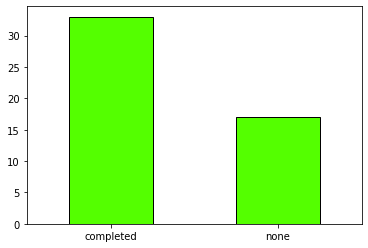

In [417]:
top50['test preparation course'].value_counts().plot(kind='bar', colormap='prism_r', edgecolor='k')
plt.xticks(rotation=0)
plt.show()

**Distribuição por Grupo dos Aprovados**

In [332]:
top50['race/ethnicity'].value_counts()

group E    14
group C    13
group D    12
group B     7
group A     4
Name: race/ethnicity, dtype: int64

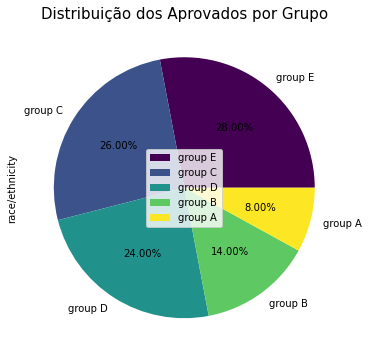

In [428]:
top50['race/ethnicity'].value_counts().plot(kind='pie', autopct='%1.2f%%', colormap='viridis', figsize=(8,6))
plt.title('Distribuição dos Aprovados por Grupo', size=15)
plt.legend(loc='center')
plt.show()

**Índice de aprovados em relaçaõ ao nível de educação dos pais**

In [436]:
levels = list(top50['parental level of education'].value_counts().index)
values = list(top50['parental level of education'].value_counts().values)

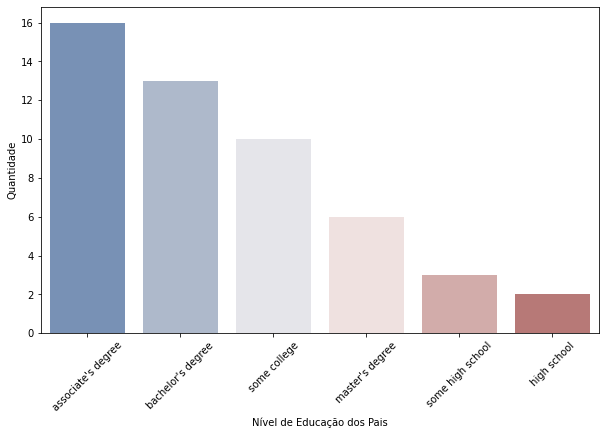

In [446]:
plt.figure(figsize=(10,6))
sns.barplot(x=levels, y=values, palette='vlag')
plt.xticks(rotation=45)
plt.xlabel('Nível de Educação dos Pais')
plt.ylabel('Quantidade')
plt.show()

**Relação entre Gênero e Raça**

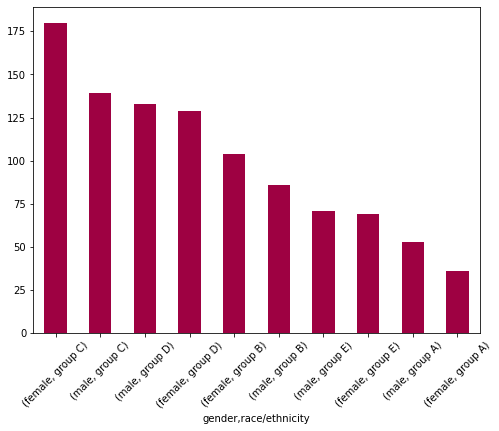

In [490]:
plt.figure(figsize=(8,6))
dados[['gender','race/ethnicity']].value_counts().plot(kind='bar', colormap='Spectral')
plt.xticks(rotation=45)
plt.show()

**Contagem de Raça Total**

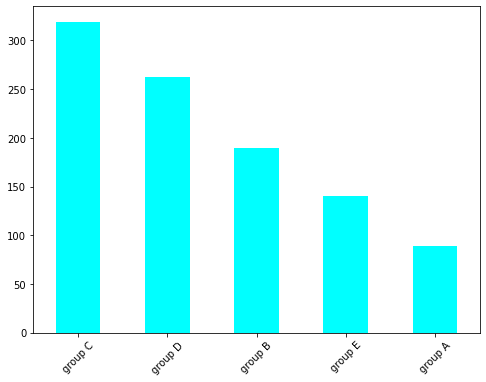

In [492]:
plt.figure(figsize=(8,6))
dados['race/ethnicity'].value_counts().plot(kind='bar', colormap='cool')
plt.xticks(rotation=45)
plt.show()